In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 다층 퍼셉트론(MultiLayer Perceptrons, MLP)

In [2]:
# 다층 퍼셉트론은 기본 피드포워드(feed-forward) 신경망, 또는 종종 그냥 신경망이라고도 함
    # 또는 입력, 출력, 은닉층의 유닛들이 모두 연결되어 있어서, 완전 연결 신경망(fully connected neural networks)라고도 함

## 신경망 모델

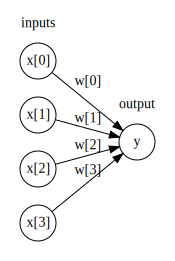

In [3]:
# MLP는 여러 단계를 거쳐 결정을 만들어내는 선형모델의 일반화된 모습이라고 볼 수 있음
display(mglearn.plots.plot_logistic_regression_graph())
# 입력 특성과 예측은 노드(node_원)로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀
    # 왼쪽 노드는 입력 특성을 나타내며, 연결선은 학습된 계수를 나타냄(w가중치는 나타내나, b편향은 나타내지 않는 그림도 많음)
    # 오른쪽 노드는 입력의 가중치합, 즉 출력을 나타냄

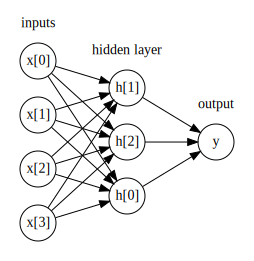

In [4]:
# MLP에서는 가중치 합을 만드는 과정이 여러번 반복되며, 먼저 중간 단계를 구성하는 은닉 유닛(hidden unit)을 계산
# 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산함
display(mglearn.plots.plot_single_hidden_layer_graph())

In [5]:
# 이런 모델은 많은 계수(또는 가중치)를 학습해야함
# 이 계수는 각 입력과 은닉층(hidden layer)의 은닉 유닛 사이, 그리고 각 은닉 유닛과 출력 사이마다 존재함
    # 위의 그림에선, 입력과 은닉층 사이의 12개의 계수, 은닉층의 각 은닉 유닛과 출력 사이의 3개의 계수, 총 15개의 계수가 존재함
    
# 그러나, 여러 개의 가중치 합을 계산하는 것은 수학적으로 하나의 가중치 합을 계산하는 것과 같음
    # x[0]이 w[0] 하나의 가중치와 곱해져 출력으로 전달되는 것과 은닉 유닛을 거쳐 다시 출력으로 가중치 합을 하는 것은
    # x[0]에 대해 가중치 변수를 정리하면 결국 동일한 식으로 표현됨
    # 즉, 단순 선형 함수만을 사용하는 것은 하나의 가중치를 여러개로 분할하는 역할만 할 뿐임

# 그래서 이러한 모델을 선형 모델보다 강력하게 만들려면 기교가 필요함
# 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 렐루(ReLU, rectified linear unit)나
# 하이퍼볼릭 탄젠트(hyperbolic tangent, tanh) 를 적용함
    # 이러한 함수들을 활성화 함수(activation function)이라하며, 렐루와 하이퍼볼릭탄젠트 외에도 시그모이드 함수도 존재함
    # 시그모이드는 로지스틱 함수로도 불리며, 1/(1+e)^(-z) 의 수식을 가지며, z는 유닛의 출력값임
    # scikit-learn은 위의 세 활성화 함수를 모두 지원
# 이 활성화 함수의 결과의 가중치 합을 계산하여, 출력값을 만듬

Text(0, 0.5, 'Relu(x), tanh(x)')

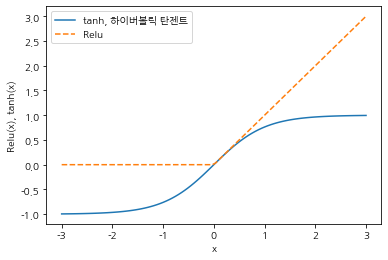

In [6]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh, 하이버볼릭 탄젠트')
plt.plot(line, np.maximum(line, 0), linestyle='--', label='Relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('Relu(x), tanh(x)')

# Relu는 0이하의 값을 모두 잘라버리고, tanh함수는 낮은 입력값에 대해선 -1에 수렴하게끔 하고, 높은 입력값에 대해선 1로 수렴하게끔 함
# 이런 비선형 함수를 이용해 신경망이 선형 모델에서 보다 더 복잡한 함수를 학습 할 수있음

# 보통 분류의 경우, 신경망 마지막 출력층에 시그모이드(이진분류)나, 소프트맥스(다중분류)함수를 적용하여 출력값을 계산함
    # 소프트맥스는 여러 유닛의 출력값을 정규화하기 위한것으로, 수식은 e^z(i) / ∑(i=1, k)e^z(i) 로 나타내며
        # z는 각 유닛의 출력값이고, k는 유닛 갯수임

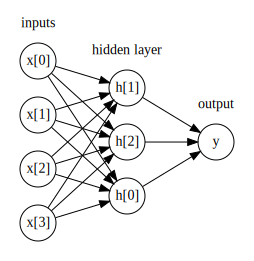

In [7]:
display(mglearn.plots.plot_single_hidden_layer_graph())

# 아래의 그래프에서 tanh 비선형 함수를 사용해서 회귀 분석 할 때, 출력을 계산하는 전체 공식은 다음과 같음
# h[0] = tanh(w[0,0]*x[0] + w[1,0]*x[1] + w[2,0]*x[2] + w[3,0]*x[3] + b[0])
# h[1] = tanh(w[0,1]*x[0] + w[1,1]*x[1] + w[2,1]*x[2] + w[3,1]*x[3] + b[1])
# h[2] = tanh(w[0,2]*x[0] + w[1,2]*x[1] + w[2,2]*x[2] + w[3,2]*x[3] + b[2])
# 출력  = v[0]*h[0] + v[1]*h[1] + v[2]*h[2] + b
    
    # w는 입력 x와 은닉층 h 사이의 가중치, v는 은닉층 h와 출력 사이의 가중치
    # v와 w는 훈련 데이터에서 학습하고, x는 입력 특성이며, 출력값은 출력될 뿐이고, h는 중간 계산값임
    # 우리가 정해야 하는 중요 매개변수는 은닉층의 유닛개수, 혹은 은닉층의 갯수이다

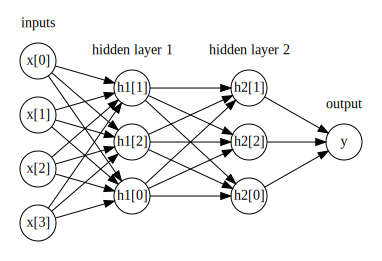

In [8]:
display(mglearn.plots.plot_two_hidden_layer_graph())
# 아래 그림처럼 은닉층을 추가할 수도 있다

In [9]:
# 이와 같이 많은 은닉층으로 구성된, 대규모의 신경망이 생기면서 이를 딥러닝이라고 부르게됨

## 신경망 튜닝

훈련 데이터셋 : 0.99
테스트 데이터셋 : 0.88


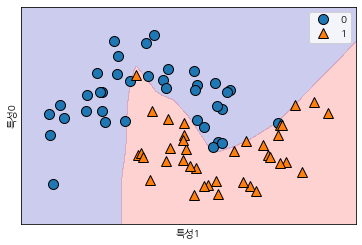

In [10]:
# two_moons dataset use, 분류를 위한 MLP 구현, MLPClassifier 적용
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
# The default solver 'adam' works pretty well on relatively
# large datasets (with thousands of training samples or more) in terms of
# both training time and validation score.
# For small datasets, however, 'lbfgs' can converge faster and perform better
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성1')
plt.ylabel('특성0')
plt.legend(loc='best')
print('훈련 데이터셋 : {:.2f}'.format(mlp.score(X_train, y_train)))
print('테스트 데이터셋 : {:.2f}'.format(mlp.score(X_test, y_test)))

In [11]:
# 신경망은 매우 비선형적 이지만, 비교적 매끄러운 결정경계를 만들음
# 최적화 알고리즘 solver='lbfgs' 사용
# 은닉 유닛은 100개를 사용하는데, 작은 데이터셋에는 과분한 크기
    # 은닉 유닛 갯수를 줄여도(모델의 복잡도가 낮아져도) 여전히 좋은 결과를 보임

훈련 데이터셋 : 0.99
테스트 데이터셋 : 0.88


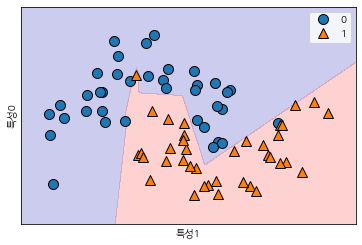

In [12]:

mlp_10 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp_10, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성1')
plt.ylabel('특성0')
plt.legend(loc='best')
print('훈련 데이터셋 : {:.2f}'.format(mlp_10.score(X_train, y_train)))
print('테스트 데이터셋 : {:.2f}'.format(mlp_10.score(X_test, y_test)))
# 결정경계가 비교적 날카로워진 것을 확인할 수 있음
# 기본 비선형 함수(활성화함수)는 (Default) Relu 함수임
# 은닉층이 하나이므로, 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨
# 더 매끄러운 결정 경계를 원한다면, 은닉 유닛 갯수를 추가하거나, 은닉층을 추가하거나, 또는 tanh함수를 사용 할 수도 있음

훈련 데이터셋 : 0.99
테스트 데이터셋 : 0.84


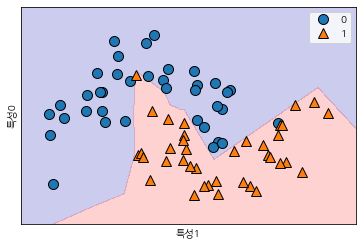

In [13]:
# 10개 유닛의 두개의 은닉층, Relu
mlp_10_2 = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp_10_2, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성1')
plt.ylabel('특성0')
plt.legend(loc='best')
print('훈련 데이터셋 : {:.2f}'.format(mlp_10_2.score(X_train, y_train)))
print('테스트 데이터셋 : {:.2f}'.format(mlp_10_2.score(X_test, y_test)))

훈련 데이터셋 : 0.99
테스트 데이터셋 : 0.84


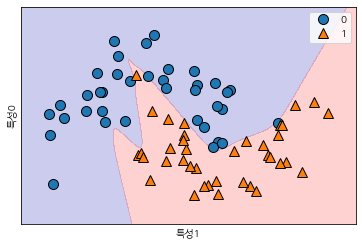

In [14]:
# 10개의 유닛으로 구성된 2개의 은닉층, tanh활성화 함수
mlp_10_2_tanh = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp_10_2_tanh, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성1')
plt.ylabel('특성0')
plt.legend(loc='best')
print('훈련 데이터셋 : {:.2f}'.format(mlp_10_2_tanh.score(X_train, y_train)))
print('테스트 데이터셋 : {:.2f}'.format(mlp_10_2_tanh.score(X_test, y_test)))


n : 10, alpha : 0.0001 훈련 데이터셋 : 0.99
n : 10, alpha : 0.0001 테스트 데이터셋 : 0.84
n : 10, alpha : 0.01 훈련 데이터셋 : 0.99
n : 10, alpha : 0.01 테스트 데이터셋 : 0.88
n : 10, alpha : 0.1 훈련 데이터셋 : 0.99
n : 10, alpha : 0.1 테스트 데이터셋 : 0.88
n : 10, alpha : 1 훈련 데이터셋 : 0.88
n : 10, alpha : 1 테스트 데이터셋 : 0.76
n : 100, alpha : 0.0001 훈련 데이터셋 : 0.99
n : 100, alpha : 0.0001 테스트 데이터셋 : 0.88
n : 100, alpha : 0.01 훈련 데이터셋 : 1.00
n : 100, alpha : 0.01 테스트 데이터셋 : 0.84
n : 100, alpha : 0.1 훈련 데이터셋 : 0.99
n : 100, alpha : 0.1 테스트 데이터셋 : 0.84
n : 100, alpha : 1 훈련 데이터셋 : 0.95
n : 100, alpha : 1 테스트 데이터셋 : 0.84


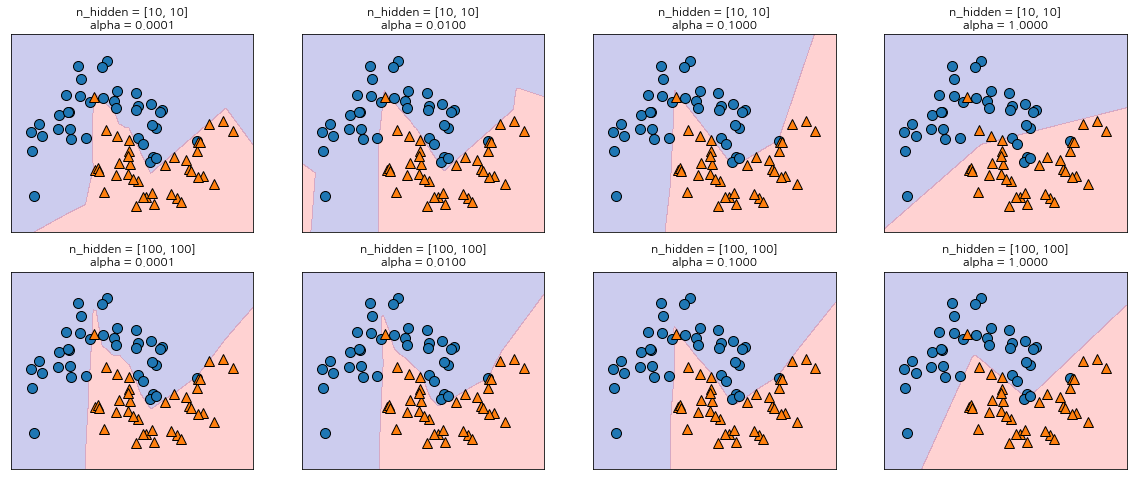

In [15]:
# 또한 리지 회귀와 선형 분류기에서 활용한 규제(L2 패널티)를 이용해서 과적합을 낮출수 있음(w가중치를 0에 가깝게)
# alpha 매개변수가 그 역할을 함, 기본값은 매우 낮게(거의 규제하지 않게) 되어 있음 0.0001

# alpha 값에 따른 영향
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mpl_alpha = MLPClassifier(solver='lbfgs', random_state=0,
                                    hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha = alpha).fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mpl_alpha, X_train, fill=True, alpha=.2, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title('n_hidden = [{}, {}]\nalpha = {:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))
        print('n : {}, alpha : {} 훈련 데이터셋 : {:.2f}'.format(n_hidden_nodes, alpha, mpl_alpha.score(X_train, y_train)))
        print('n : {}, alpha : {} 테스트 데이터셋 : {:.2f}'.format(n_hidden_nodes, alpha, mpl_alpha.score(X_test, y_test)))

In [16]:
# 은닉층의 수, 은닉층의 유닛 갯수, 규제(alph)를 통해 복잡도 조절가능
# dropout, 드롭아웃을 통해 규제를 할 수도 있음
    # 은닉층 유닛의 일부를 랜덤하게 작동시키지 않는것
    # 마치 서로 다른 신경망을 앙상블 시키는 것과 같은 효과를 냄(랜덤포레스트 샘플링과 같이)
    # 과적합을 방지, sklearn에선 아직 지원하지 않음

### 유념해야할 점

In [17]:
# 신경망에선 학습을 시작하기 전에, 가중치를 무작위로 설정하며, 이 무작위한 초기화가 모델의 학습에 영향을 주곤함
# 따라서 같은 매개변수를 사용하더라도, 초깃값이 다르면 모델이 많이 달라질 수 있음
# 신경망이 거대하고 복잡도가 적절하다면, 끼치는 영향이 적지만 항상 유념해야함(특히 작은 신경망의 경우에)

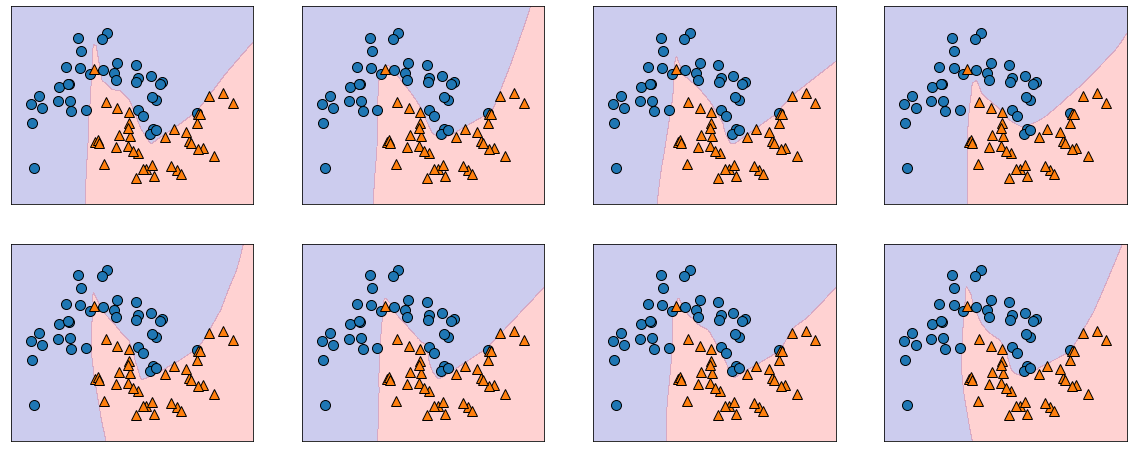

In [18]:
# 같은 매개변수를 가졌지만, 가중치 초기화가 각자 다르게된 모델들
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp_w_default = MLPClassifier(solver='lbfgs', random_state=i,
                                    hidden_layer_sizes=[100, 100]).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp_w_default, X_train, fill=True, alpha=.2, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
    

## 유방암 데이터셋에 MLPClassifier 적용

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('유방암 데이터의 특성별 최댓값:\n', cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [21]:
mlp_cancer = MLPClassifier(random_state=42).fit(X_train, y_train)

print('훈련 데이터셋 : {:.2f}'.format(mlp_cancer.score(X_train, y_train)))
print('테스트 데이터셋 : {:.2f}'.format(mlp_cancer.score(X_test, y_test)))

훈련 데이터셋 : 0.94
테스트 데이터셋 : 0.92


In [22]:
# 꽤 높은 정확도가 나왔지만, 다른 모델만큼은 아님
# SVC의 경우는 데이터의 스케일이 영향을 미쳤음
# 이와 비슷하게 신경망에서도 모든 입력 특성을 평균 0, 분산 1이 되도록 변형하는 것이 좋음
    # 데이터에서 평균을 빼고 표준편차로 나눈값을 z-점수, 표준 점수(standard score)라고 함
    # z-점수는 평균이 0, 분산이 1인 표준 정규 분포 임
    # 분산 : ∑i번째값 - 평균값 / i(샘플인경우 i-1)
    # 표준편차 : 분산의 √

# 표준 점수에 적용하기 위해서 평균을 0,  분산을 1로 맞춤
# 3장에서 자동으로 처리해주는 StanddardScaler 가 있음

In [23]:
# 훈련 세트 각 특성의 평균 계산
mean_on_train = X_train.mean(axis=0)

# 훈련 세트 각 특성의 표준 편차 계산
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 뺴고 표준편차로 나누면
# 평균 0, 표준 편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train

# 훈련 데이터의 평균과 표준 편차를 이용해 같은 변환을 테스트 세트에도 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp_z = MLPClassifier(random_state=0, solver='adam', max_iter=1000).fit(X_train_scaled, y_train)
# 반복 횟수를 늘려서(adam 알고리즘은 경사하강법의 학습률 매개변수를 학습이 반복됨에 따라 조정해가는 알고리즘)
# max_iter default 200, adam or sgd 일때, early_stopping 을 통해 조기종료 할 수 있음
    # 검증횟수 향상 기준 정하는 n_iter_no_change 매개변수 있음
    # 검증데이터의 비율은 vaildation_fracion 매개변수 설정 가능 0.1default (훈련데이터 10%)
print('훈련 데이터셋 : {:.4f}'.format(mlp_z.score(X_train_scaled, y_train)))
print('테스트 데이터셋 : {:.4f}'.format(mlp_z.score(X_test_scaled, y_test)))


훈련 데이터셋 : 1.0000
테스트 데이터셋 : 0.9720


In [24]:
# 훈련, 테스트 차이가 존재(과적합 가능)
# 규제 적용 alpha 0.0001 > 1(아주강한 규제)
mlp_z_alpha = MLPClassifier(random_state=0, solver='adam', max_iter=1000, alpha=1).fit(X_train_scaled, y_train)
print('훈련 데이터셋 : {:.4f}'.format(mlp_z_alpha.score(X_train_scaled, y_train)))
print('테스트 데이터셋 : {:.4f}'.format(mlp_z_alpha.score(X_test_scaled, y_test)))


훈련 데이터셋 : 0.9883
테스트 데이터셋 : 0.9720


## 신경망 학습과정 분석

In [25]:
# 입력과 은닉층 사이의 학습된 가중치
# 행은 30개의 입력 특성, 열은 100개의 은닉 유닛
# 밝은색 큰 양수값, 어두운색 음수값

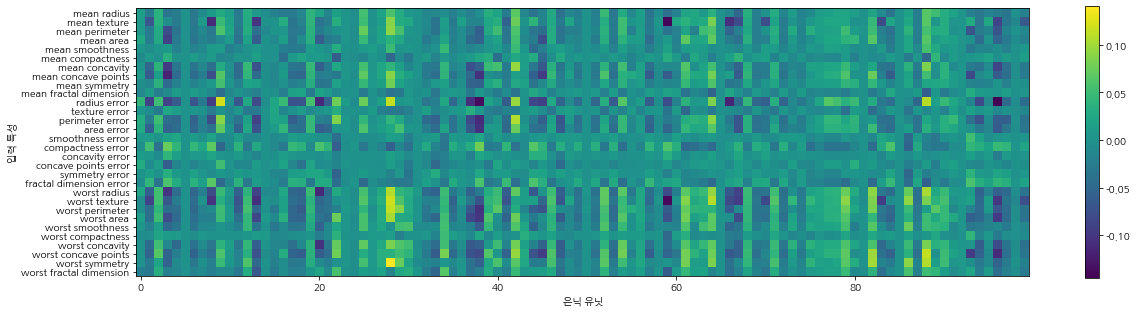

In [26]:
plt.figure(figsize=(20,5))
plt.imshow(mlp_z_alpha.coefs_[0], interpolation='none', cmap='viridis')
    # .coefs_[0] -> 입력과 제0번 은닉층 의 가중치, .coefs_[n] -> n번 은닉층 ~~ 출력층의 가중치
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

In [27]:
# 모든 은닉 유닛에서 작은 가중치를 가진 특성은 덜 중요하다고 판단 가능
# 'smoothness', 'mean compactness' 가 다른 특성들보다 가중치가 낮음
    # 덜 중요하거나, 신경망에 적절하게 반영되지 않았을 수 있음
# 은닉층과 출력층 사이도 시각화 할 수 있지만, 해석하기 어려움
# MLPClassifier, MLPRegressor 는 손쉬운 인터페이스를 제공하지만, CNN RNN 등 구현 x
    # Keras, lasagna, tensorflow, pytorch 가능
    # 위 라이브러리 GPU사용 가능 

## 정리

In [28]:
# 대량의 정보에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있음
# 충분한 연산 시간과 데이터를 주고, 매개변수를 세심하게 조절하면 mr보다 더 뛰어난 성능을 보임

# 학습시간이 오래걸린다는 단점과, 데이터 전처리에 주의 해야함
# SVM과 비슷하게 모든 특성이 같은 종류의 의미를 가진 동질의 데이터에서 잘 작동함
# 다른 종류의 의미를 가진 모델은 트리에서 더 잘 작동할 수 있음

## 신경망의 복잡도 추정

In [29]:
# 신경망에서 가장 중요한 매개변수는 은닉층의 갯수와 각 은닉층의 은닉 유닛 수 임
# 처음엔 한개, 두개의 작은 은닉층으로 시작해서 늘려가야함
# 각 은닉 유닛수는 보통 입력 특성의 수와 비슷하게 설정하지만, 수천 초중반을 넘는 일은 거의 없음

# 모델 복잡도에 관해 도움이 될만한 측정치는 학습된 가중치 또는 계수의 수
    # if, 입력 특성 100개, 유닛수 100개의 이진분류라면
    # 각 은닉층에, 100(가중치)*100(특성) +100(편향) = 10100개의 가중치 존재
    # 은닉층 - 출력층 간, 100*1 + 1 = 101개의 가중치 존재
    
# 위와 같은 방법으로 모델의 가중치 학습량을 추정함

# 신경망의 매개변수를 조정하는 일반적인 방법
    # 먼저 충분히 과적합시켜서 문제를 해결 할 수있을 만큼 큰 모델을 만듬
    # 그 다음, 훈련 데이터의 학습을 충분히 진행 할 수 있을 만큼 신경망 구조를 줄이거나, 규제 강화를 위해 alpha값을 증가시킴 -> 일반화

# solver 매개변수를 통해, 모델 학습의 알고리즘을 설정할 수 있음
# adam이 Default, 대부분의 경우 잘 작동하지만, 데이터의 스케일에 영향을 많이 받음
    # 그래서 데이터를 평균 0, 분산 1로 조정하는게 중요함
# lbfgs는 안정적이지만, 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래걸림
    # BFGS 알고리즘은 의사 뉴턴 메서드 중 하나, L-BFGS 알고리즘은 BFGS 알고리즘을 제한한 메모리 공간에서 구현하는 방법
# 옵션중 sgd는 다른 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있음
    # momentum, nesterovs_momentum 영향을 끼치는 매개변수
    # momentum 방식은 이전의 그래디언트를 momentum 매개변수의 비율만큼 현재 계산된 그래디언트에 반영하여, 갱신할 그래디언트를 구함
    # 이전 단계들의 그래디언트를 속도라고 부르며, 일정 바율의 과거 그래디언트를 포함하고 있어서 관성 같은 효과를 준다고 볼 수 있음
    # nesterovs_momentum은 모멘텀에서 구한 그래디언트를 이전 그래디언트로 가정하고 한번 더 모멘텀 방식을 적용
        # 갱신할 그래디언트를 계산함

# solover == adam or sgd 일떄, 전체 데이터를 나눈 mini-batch 를 사용하여, 점진적으로 학습하는 경우 있음
# 전체 데이터를 메모리에 적재할 수 없다면, fit 메소드 대신에, partial_fit을 사용할 수 있음
    